In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

advert = pd.read_csv('advertising.csv')

# Build linear regression model using TV and Radio as predictors
# Split data into predictors X and output Y
predictors = ['TV', 'Radio']
X = advert[predictors]
y = advert['Sales']

# Initialise and fit model
lm = LinearRegression()
model = lm.fit(X, y)

In [23]:
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = 2.9210999124051362
betas = [0.04575482 0.18799423]


In [24]:
new_X = [[300, 200]]
print(model.predict(new_X))

[54.24638977]


/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


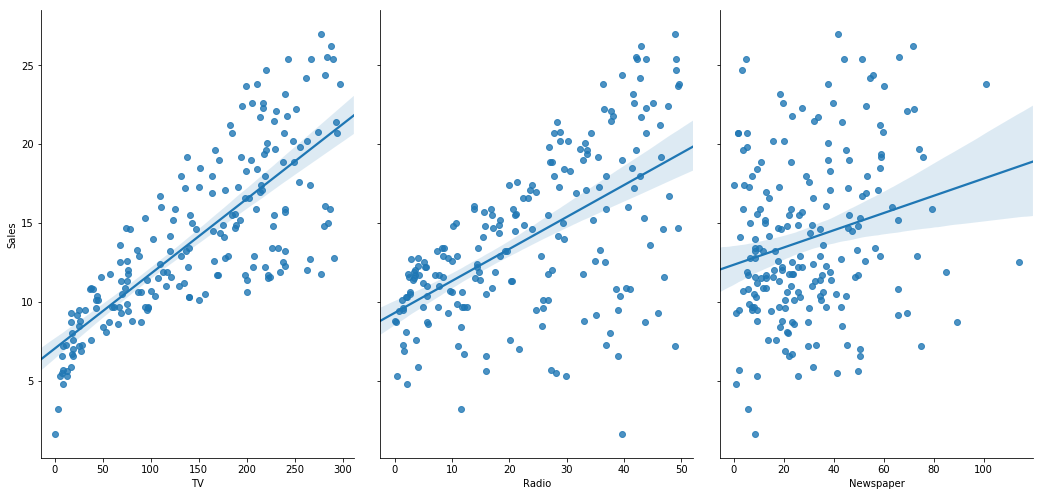

In [25]:
# visualize the relationship between the features and the response using scatterplots
# this produces pairs of scatterplot as shown
# use aspect= to control the size of the graphs
# use kind='reg' to plot linear regression on the graph
sns.pairplot(advert, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

In [27]:
feature_cols = ['TV', 'Radio', 'Newspaper']

# use the list to select a subset of the original DataFrame
X = advert[feature_cols]

# equivalent command to do this in one line using double square brackets
# inner bracket is a list
# outer bracker accesses a subset of the original DataFrame
X = advert[['TV', 'Radio', 'Newspaper']]

# select a Series from the DataFrame
y = advert['Sales']

# equivalent command that works if there are no spaces in the column name
# you can select the Sales as an attribute of the DataFrame
y = advert.Sales

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [29]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# pair the feature names with the coefficients
# hard to remember the order, we so we python's zip function to pair the feature names with the coefficients
zip(feature_cols, linreg.coef_)

In [30]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

2.8769666223179318
[0.04656457 0.17915812 0.00345046]


In [33]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

# calculate MAE by hand
print((10 + 0 + 20 + 10) / 4)

# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

# calculate MSE by hand
import numpy as np
print((10**2 + 0**2 + 20**2 + 10**2) / 4)

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

# calculate RMSE by hand
import numpy as np
print(np.sqrt(((10**2 + 0**2 + 20**2 + 10**2) / 4)))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

10.0
10.0
150.0
150.0
12.24744871391589
12.24744871391589


In [34]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


1.4046514230328955


In [36]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio']

# use the list to select a subset of the original DataFrame
X = advert[feature_cols]

# select a Series from the DataFrame
y = advert.Sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3879034699382888
